In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy.random as ra
import pandas as pd
import seaborn as sns
import statistics
from scipy import signal
import numpy.linalg as la 

# Noise-Foreground

Text(0.5, 1.0, 'Noise Foreground Correlation')

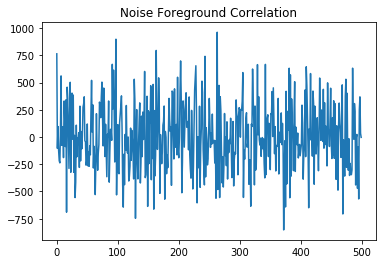

In [22]:
df_NFG = pd.read_csv('noise_fg.txt', sep=" ", header=None)
df_NFG.columns = ["cov", "mean", "sigma"]
plt.plot(df_NFG['cov'])
plt.title('Noise Foreground Correlation')

In [41]:
df_NFG['sigma'], df_NFG['cov']

(0      0.039138
 1      0.032766
 2      0.027845
 3      0.035149
 4      0.036219
          ...   
 495    0.034838
 496    0.030231
 497    0.036893
 498    0.034303
 499    0.034059
 Name: sigma, Length: 500, dtype: float64,
 0      763.758056
 1     -104.257352
 2       95.937885
 3     -123.473855
 4     -217.580390
           ...    
 495   -568.338249
 496    247.682065
 497    368.661113
 498     33.943384
 499     -3.215681
 Name: cov, Length: 500, dtype: float64)

0.006889916565807711


Text(0.5, 1.0, 'Noise Foreground Correlation')

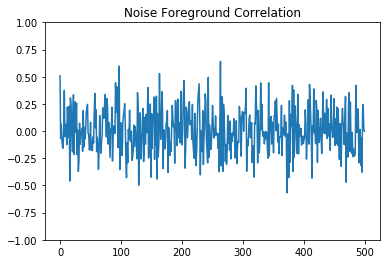

In [30]:
normalized_NFG = (df_NFG['cov']-df_NFG['mean'])/1500

print(np.mean((df_NFG['cov']-df_NFG['mean'])/1500))

plt.plot(normalized_NFG)
plt.ylim(-1,1)
plt.title('Noise Foreground Correlation')

# Noise-Noise

Text(0.5, 1.0, 'Noise Noise Correlation')

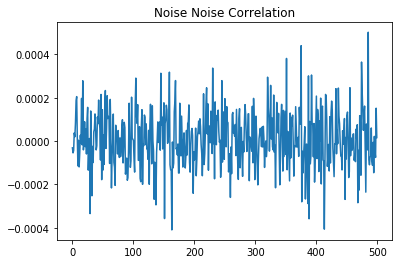

In [32]:
df_NN = pd.read_csv('noise_noise.txt', sep=" ", header=None)
df_NN.columns = ["cov", "mean", "sigma"]
plt.plot(df_NN['cov'])
plt.title('Noise Noise Correlation')


11.3021254415954


Text(0.5, 1.0, 'Noise-Noise Correlation')

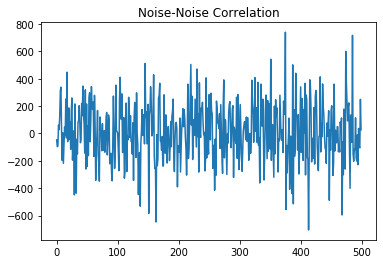

In [45]:
normalized_NN = (df_NN['cov']-df_NN['mean'])/df_NN['sigma']

print(np.mean((df_NN['cov']-df_NN['mean'])/df_NN['sigma']))

plt.plot(normalized_NN)
#plt.ylim(-1,1)
plt.title('Noise-Noise Correlation')
plt.hidt

# Data with mean initially subtracted

In [37]:
df_corr = pd.read_csv('corr_submean.txt', sep=" ", header=None)
df_corr.columns = ["Noise + FG", "Noise-Noise", "Noise w/ Itself"]
df_corr.describe()

,Noise + FG,Noise-Noise,Noise w/ Itself
count,500.000000,500.000000,5.000000e+02
mean,0.000998,0.004359,1.000000e+00
std,0.025374,0.126437,1.217406e-16
min,-0.075718,-0.348030,1.000000e+00
25%,-0.013921,-0.087870,1.000000e+00
50%,0.000274,-0.000331,1.000000e+00
75%,0.015783,0.100994,1.000000e+00
max,0.076171,0.303144,1.000000e+00


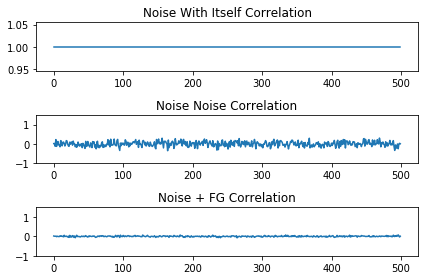

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ax1.plot(df_corr['SN'])
ax1.set_title('Noise With Itself Correlation')

ax2.plot(df_corr['NN'])
ax2.set_title('Noise Noise Correlation')
ax2.set_ylim(-1,1.5)


ax3.plot(df_corr['NFG'])
ax3.set_title('Noise + FG Correlation')
ax3.set_ylim(-1,1.5)

plt.tight_layout()

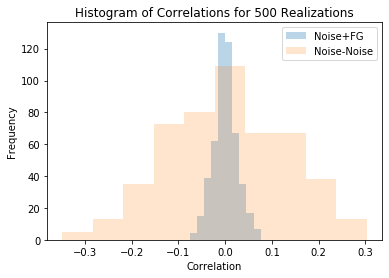

In [17]:
plt.hist(df_corr['NFG'], alpha = 0.3, label = 'Noise+FG')
plt.hist(df_corr['NN'], alpha = 0.2, label = 'Noise-Noise')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Histogram of Correlations for 500 Realizations')
plt.legend()


In [ ]:
df_NFG = pd.read_csv('noise_fg.txt', sep=" ", header=None)
df_NFG.columns = ["cov", "mean", "sigma"]
plt.plot(df_NFG['cov'])
plt.title('Noise Foreground Correlation')

# Same Order FG

In [14]:
df_SO = pd.read_csv('corr_submean_sameO.txt', sep=" ", header=None)
df_SO.columns = ["NFG", "NN", "SN"]
df_SO.describe()

,NFG,NN,SN
count,200.000000,200.000000,2.000000e+02
mean,-0.009645,-0.009638,1.000000e+00
std,0.136997,0.136991,1.316930e-16
min,-0.407905,-0.407748,1.000000e+00
25%,-0.108101,-0.108106,1.000000e+00
50%,-0.007907,-0.007724,1.000000e+00
75%,0.082523,0.082512,1.000000e+00
max,0.317127,0.316987,1.000000e+00


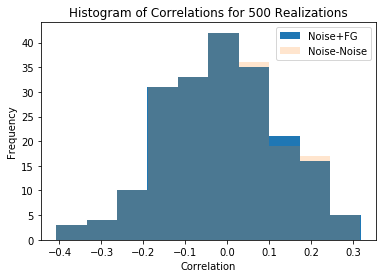

In [11]:
plt.hist(df_SO['NFG'], label = 'Noise+FG')
plt.hist(df_SO['NN'], alpha = 0.2, label = 'Noise-Noise')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Histogram of Correlations for 500 Realizations')
plt.legend()



In [16]:
df_covs = pd.read_csv('covs_sameO.txt', sep=" ", header=None)
df_covs.columns = ["NFG", "NN", "SN"]
df_covs.describe()

#this is kiind of werid that these two are statistically identical!!!?!?!?!?

,NFG,NN,SN
count,200.000000,200.000000,200.000000
mean,-0.000010,-0.000010,0.000910
std,0.000127,0.000127,0.000155
min,-0.000408,-0.000408,0.000586
25%,-0.000094,-0.000094,0.000801
50%,-0.000007,-0.000007,0.000900
75%,0.000072,0.000072,0.001014
max,0.000305,0.000305,0.001425


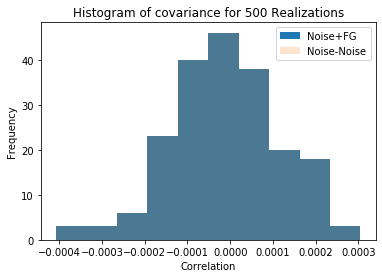

In [25]:
plt.hist(df_covs['NFG'], label = 'Noise+FG')
plt.hist(df_covs['NN'], alpha = 0.2, label = 'Noise-Noise')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Histogram of covariance for 500 Realizations')
plt.legend()




In [17]:
df_FF = pd.read_csv('fg_fg.txt', sep=" ", header=None)
df_FF.columns = ["FF_corr", "FF_cov"]
df_FF.describe()

,FF_corr,FF_cov
count,200.000000,200.000000
mean,-0.001550,-4217.506378
std,0.024671,67072.853024
min,-0.087140,-227085.439827
25%,-0.018934,-52061.502897
50%,-0.002732,-7534.693529
75%,0.017266,47629.505785
max,0.054753,150703.938674


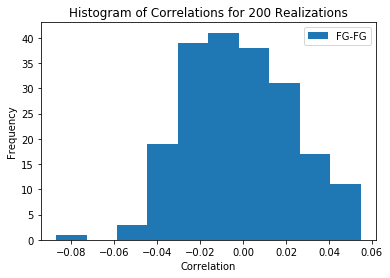

In [22]:
plt.hist(df_FF['FF_corr'], label = 'FG-FG')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Histogram of Correlations for 200 Realizations')
plt.legend()



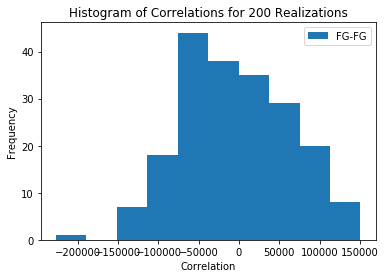

In [23]:
plt.hist(df_FF['FF_cov'], label = 'FG-FG')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Histogram of Correlations for 200 Realizations')
plt.legend()


